**Instituto de Informática - UFG**

Disciplina: Inteligência Computacional

Prof. Cedric Luiz de Carvalho


Grupo (Gabriel Olímpio Rocha Leão, Geovanny Magalhães Novais)

---


Analista de dados: Gabriel Olímpio Rocha Leão

---

Engenheiro(a) do conhecimento: Geovanny Magalhães Novais

---


#Especificação do problema : Máquinas de vetores de suporte


# Abrindo o dataframe e análise inicial

* Montando o Google Drive para acessar os dados de entrada

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


* Importando a database, criando o dataframe

In [ ]:
import pandas as pd

dados = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Trabalho5/breastCancerWisconsinData.csv')

* Exibindo a descrição das colunas do dataframe.



Coloque aqui o nome das colunas usadas


* Exibindo todos os usuários do dataframe

In [ ]:
pd.set_option('display.max_rows', dados.shape[0]+1)
dados.head(698)

* Renomeando as colunas para facilitar a interpretação:

In [ ]:
dados.columns = [
                 'Id', 'espessuraDoAglomerado', 'uniformidadeDoTamanhoDaCelula', 
                 'uniformidadeDoFormatoDaCelula', 'adesaoMarginal', 'tamanhoDaCelulaEpitelialUnica',
                 'nucleosNus', 'cromatinaSuave', 'normalNucleoni',  
                 'mitoses' ,  'classeDoTumor'
]

* Obtendo o número de linhas e de colunas do dataset

* Contando todos os casos na base de dados

In [ ]:
total = len(dados)
print(total)

In [ ]:
dados.shape

* Contando os casos de tumores benignos na base de dados:

In [ ]:
benignos = len(dados.loc[dados['classeDoTumor']==2])
print(benignos)

457


* Contando os casos de tumores malignos na base de dados:

In [ ]:
malignos = total - benignos
print(malignos)

241


* Calculando a porcentagem de presença de tumores benignos, perante o total de pacientes usando da fórmula:
Presença = (Ocorrência*100)/Total

In [ ]:
print ( (benignos*100)/total )

Como os casos de sobreviventes ocupam 65% dos pacientes, seria prudente balancear a base de dados, considerando esse fato

# Verificando a presença de dados faltantes
* Somando os valores nulos encontrados em cada coluna, para quantificar-los.

In [ ]:
nulos = dados.isnull().sum()
print(nulos)

Notamos que não existem valores NaN na base de dados

Apesar de não encontramos valores NaN, encontramos o símbolo de "?" presente na coluna nucleosNus em 16 ocasiões.

Optamos por remover essas linhas que tinham "?" na coluna nucleosNus

In [ ]:
interrogacao = dados.loc[dados['nucleosNus']=='?']
dados.drop(interrogacao.index, inplace = True)

In [ ]:
dados.shape

(682, 11)

## Interpretando o dataframe através de gráficos

* Importando a biblioteca que cria os gráficos





In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Criando gráficos que relacionam colunas dois a dois:

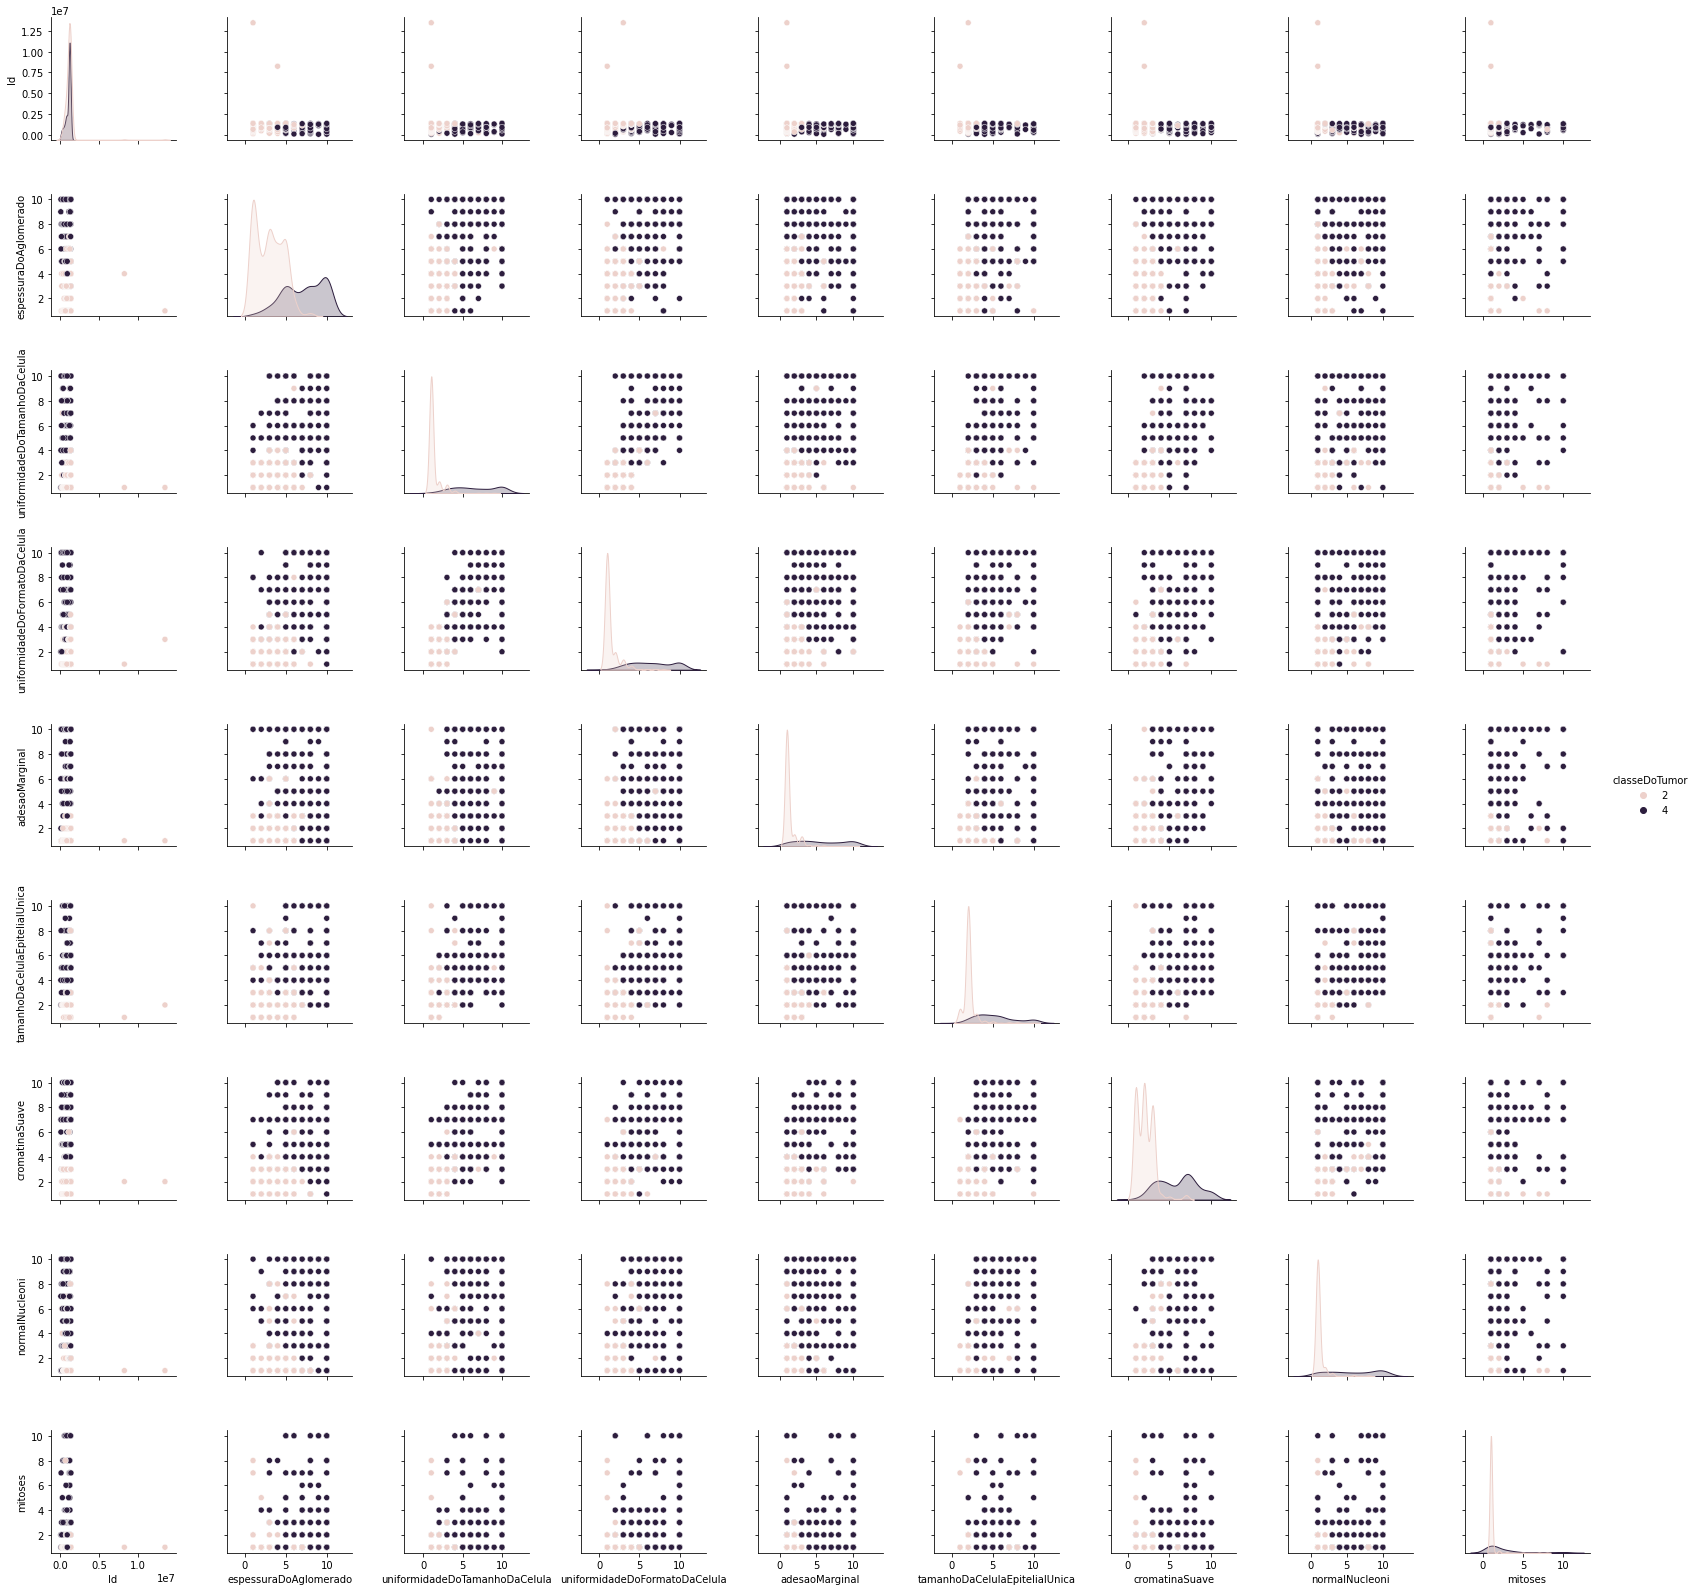

In [ ]:
sns.pairplot(dados, hue="classeDoTumor")

* Criando uma função que retorna uma legenda para gráfico de pizza

In [ ]:
import numpy as np

def func(pct, allvals):
  absolute = int(pct/100*np.sum(allvals))
  return "{:.2f}%\n({:d} pacientes)".format(pct, absolute)

* Criando um gráfico sobre pacientes diabéticos ou não

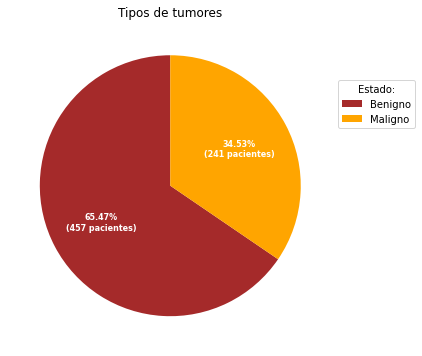

In [ ]:
nomeGrafico = ['Benigno', 'Maligno']
infoGrafico = [benignos, malignos]
corGrafico = ("brown", "orange")

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie(infoGrafico, colors=corGrafico, autopct=lambda pct: func(pct, infoGrafico), startangle=90,
                                  textprops=dict(color="w"))

ax.legend(wedges, nomeGrafico,
          title= "Estado:",
          loc ="center left",
          bbox_to_anchor=(1, 0.75))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Tipos de tumores")

plt.show()

## Comparando as colunas e suas relações

* Criando heatmap para avaliar o grau de dependência entre cada variável

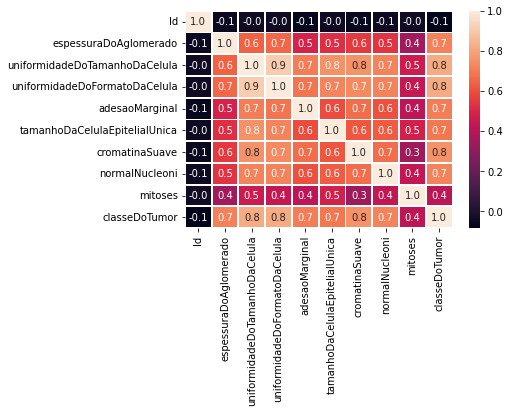

In [ ]:
import seaborn as sn

correlacao = dados.corr()

matrizCorrelacao = sn.heatmap(correlacao, annot = True, fmt='.1f', linewidths=.9)
matrizCorrelacao

Notamos que a coluna Id não possui correlação com nenhuma outra variável, permitindo assim a sua remoção:

In [ ]:
dados.drop(['Id'], axis=1, inplace=True)

#Gerando as novas bases de dados

* Criando um dataframe que seleciona aleatoriamente 200 pacientes com tumor maligno

In [ ]:
tumorMaligno = dados[dados['classeDoTumor']==4]
selecionadosComTumorMaligno = tumorMaligno.sample(n=200, random_state= np.random.RandomState(0))
selecionadosComTumorMaligno.head()

,espessuraDoAglomerado,uniformidadeDoTamanhoDaCelula,uniformidadeDoFormatoDaCelula,adesaoMarginal,tamanhoDaCelulaEpitelialUnica,nucleosNus,cromatinaSuave,normalNucleoni,mitoses,classeDoTumor
439,10,4,3,10,4,10,10,1,1,4
339,10,3,3,1,2,10,7,6,1,4
238,10,4,3,2,3,10,5,3,2,4
253,9,10,10,1,10,8,3,3,1,4
281,1,4,3,10,4,10,5,6,1,4


* Criando um dataframe que seleciona aleatoriamente 400 pacientes com tumor benigno

In [ ]:
tumorBenigno = dados[dados['classeDoTumor']==2]
selecionadosComTumorBenigno = tumorBenigno.sample(n=400, random_state= np.random.RandomState(0))
selecionadosComTumorBenigno.head()

,espessuraDoAglomerado,uniformidadeDoTamanhoDaCelula,uniformidadeDoFormatoDaCelula,adesaoMarginal,tamanhoDaCelulaEpitelialUnica,nucleosNus,cromatinaSuave,normalNucleoni,mitoses,classeDoTumor
595,4,1,2,1,2,1,2,1,1,2
443,5,1,1,6,3,1,2,1,1,2
473,5,1,1,1,2,1,1,1,1,2
687,4,1,1,1,2,1,1,1,1,2
643,2,1,1,1,2,1,1,1,1,2


* Criando um dataframe balanceado em 65% (400) com tumor benigno para 35% (200) com tumor maligno, mantendo a proporção dos dados totais originais

In [ ]:
novosDados1 = pd.merge(selecionadosComTumorBenigno, selecionadosComTumorMaligno, how='outer').reset_index()
novosDados1.head(190-210)

* Removendo a coluna index:

In [ ]:
novosDados1.drop(['index'], axis=1, inplace=True)

* Criando o arquivo csv já balanceado para o outro membro do grupo implementar

In [ ]:
novosDados1.to_csv('/content/drive/MyDrive/ColabNotebooks/Trabalho5/db1.csv')

* Criando um dataframe que seleciona aleatoriamente 200 pacientes com tumor maligno

In [ ]:
tumorMaligno2 = dados[dados['classeDoTumor']==4]
selecionadosComTumorMaligno2 = tumorMaligno2.sample(n=200, random_state= np.random.RandomState(0))
selecionadosComTumorMaligno2.head()

* Criando um dataframe que seleciona aleatoriamente 200 pacientes com tumor benigno

In [ ]:
tumorBenigno2 = dados[dados['classeDoTumor']==2]
selecionadosComTumorBenigno2 = tumorBenigno2.sample(n=200, random_state= np.random.RandomState(0))
selecionadosComTumorBenigno2.head()

* Criando um dataframe balanceado em 50% (200) com tumor benigno para 50% (200) com tumor maligno, mantendo a proporção dos dados totais originais

In [ ]:
novosDados2 = pd.merge(selecionadosComTumorBenigno2, selecionadosComTumorMaligno, how='outer').reset_index()
novosDados2.head(190-210)

In [ ]:
novosDados1.head()

,espessuraDoAglomerado,uniformidadeDoTamanhoDaCelula,uniformidadeDoFormatoDaCelula,adesaoMarginal,tamanhoDaCelulaEpitelialUnica,nucleosNus,cromatinaSuave,normalNucleoni,mitoses,classeDoTumor
0,4,1,2,1,2,1,2,1,1,2
1,4,1,2,1,2,1,2,1,1,2
2,4,1,2,1,2,1,2,1,1,2
3,5,1,1,6,3,1,2,1,1,2
4,5,1,1,1,2,1,1,1,1,2


In [ ]:
novosDados2.head()

,espessuraDoAglomerado,uniformidadeDoTamanhoDaCelula,uniformidadeDoFormatoDaCelula,adesaoMarginal,tamanhoDaCelulaEpitelialUnica,nucleosNus,cromatinaSuave,normalNucleoni,mitoses,classeDoTumor
0,4,1,2,1,2,1,2,1,1,2
1,4,1,2,1,2,1,2,1,1,2
2,4,1,2,1,2,1,2,1,1,2
3,5,1,1,6,3,1,2,1,1,2
4,5,1,1,1,2,1,1,1,1,2


Removendo a coluna index:

In [ ]:
novosDados2.drop(['index'], axis=1, inplace=True)

* Criando o arquivo csv já balanceado para o outro membro do grupo implementar

In [ ]:
novosDados2.to_csv('/content/drive/MyDrive/ColabNotebooks/Trabalho5/db2.csv')